# 🧮 Simple Moving Average

I think not much explanation is required here, as this is *simple*. But let's check out some usefulness here:

From Me:
- It is used to show the zaggy data in a smooth manner
- Helps to give the overall trend of the time-series
- Used to show the intuition of the data without showing much information

From The Author:
- We use the "window" when need to know the ***recent*** values' information (mean, std etc)
- Recent average might be more useful than the *overall* average

### Let's see some code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("../data/sp500_close.csv", index_col=0, parse_dates=True)

In [22]:
df.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


We are going to perform SMA on `AAPLE` data only for the first, so let's grab those.

In [24]:
aaple = df[["AAPL"]]

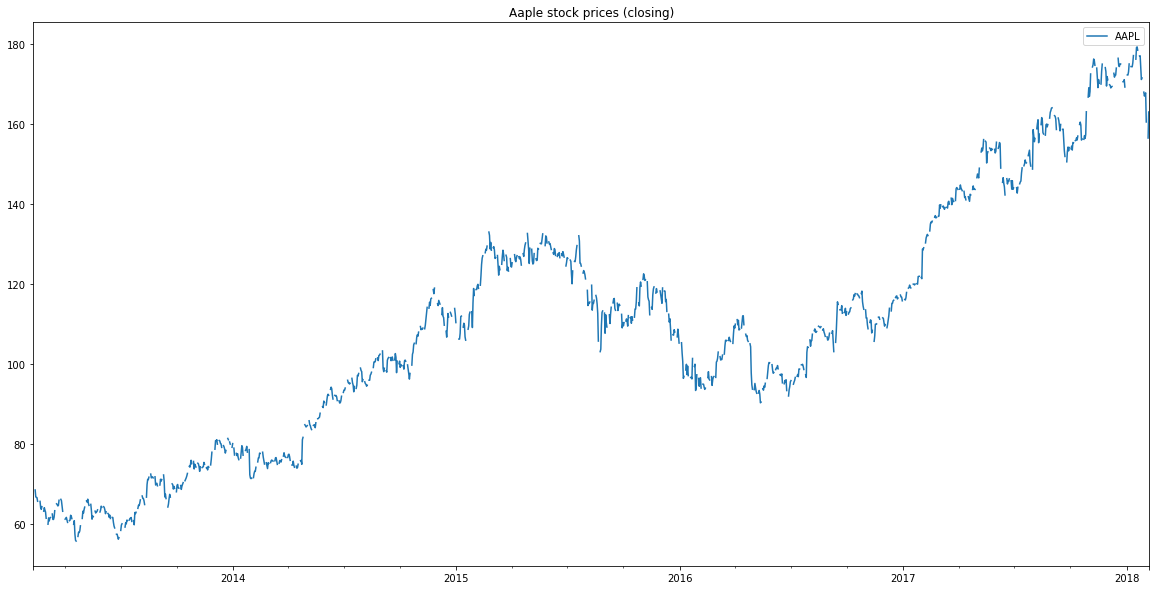

In [27]:
aaple.plot(figsize=(20, 10))
plt.title("Aaple stock prices (closing)");

You might see the ***gaps*** in the plot. They are because of the NaN values caused by probably the holidays or weekend etc. So for that used `dropna` and wil work with that.

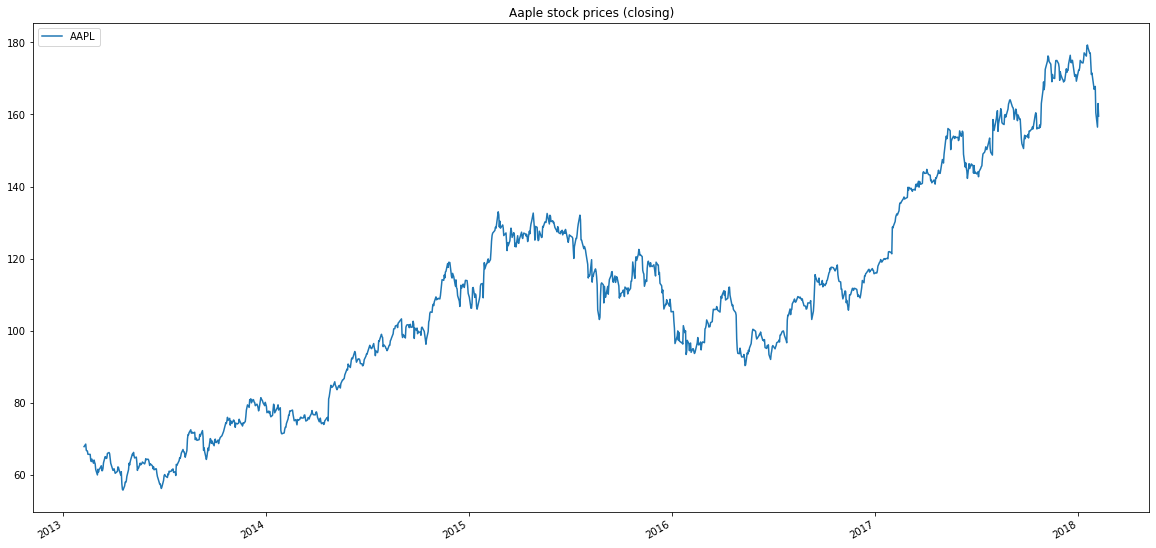

In [33]:
aaple = aaple.dropna()
aaple.plot(figsize=(20, 10))
plt.title("Aaple stock prices (closing)");

Just for fun, let's calculate the `log returns` for this AAPLE.

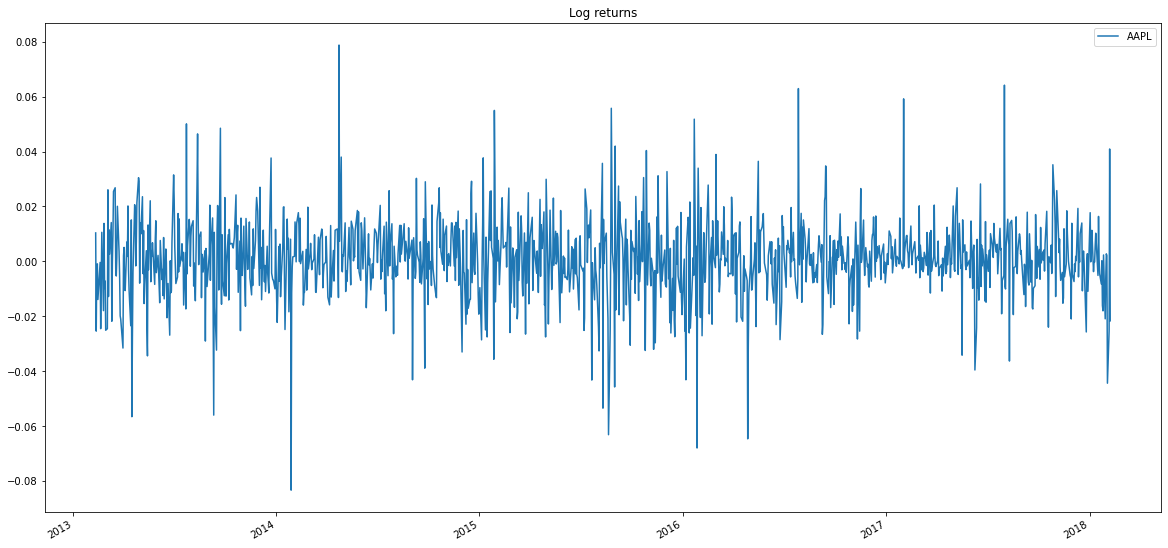

In [48]:
np.log(aaple.pct_change() + 1).plot(figsize=(20, 10)) 
plt.title("Log returns");

See that — the stuff that we have calculated above is the **returns** but not the **gross returns**. Meaning, you will have to *add the percentage of buy value* **to the** *buy value* **to get** *the current value*.

Which is unlike the Gross Returns where you can *directly multiply the value* **to get** *the current value*. And in addition we have taken the log of the **returns** of which I have told you not to do so. But we have done it here by adding +1.

#### Moving On

In [74]:
aaple["SMA-7"] = aaple["AAPL"].rolling(7).mean()
aaple["SMA-30"] = aaple["AAPL"].rolling(30).mean()
aaple["SMA-150"] = aaple["AAPL"].rolling(150).mean()

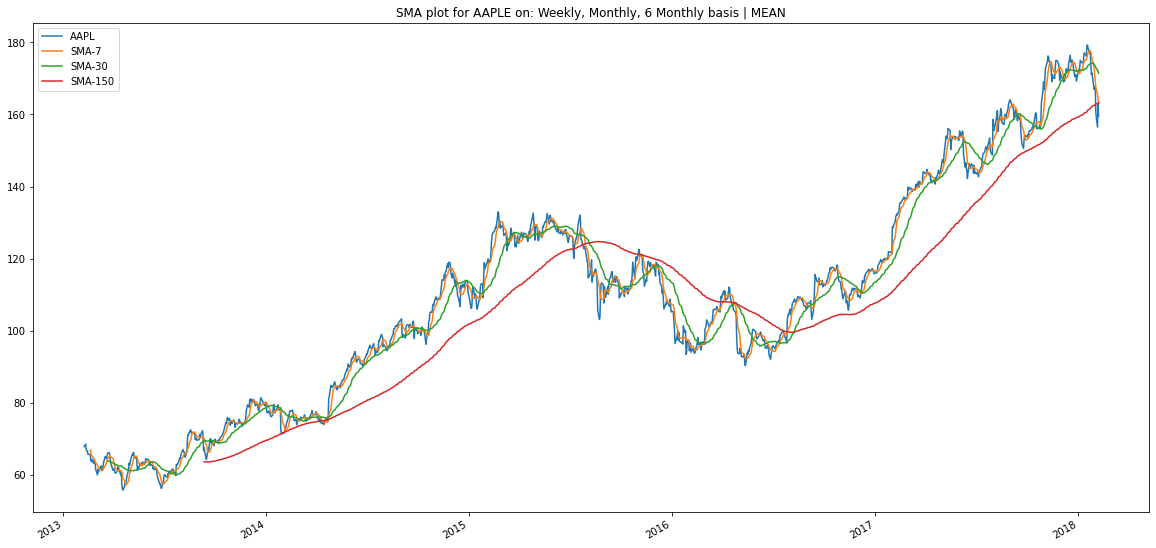

In [81]:
aaple.plot(figsize=(20, 10))
plt.title("SMA plot for AAPLE on: Weekly, Monthly, 6 Monthly basis | MEAN");

- The **lagging** thing is here.
- Which means, the SMA ***lags behind*** the real values — the bigger the window size it, the more lagging effect will be.
- Lagging means: "Delay".
- We can also achieve it by `.shift()`.

In [82]:
aaple["SMStd-7"] = aaple["AAPL"].rolling(7).std()
aaple["SMStd-30"] = aaple["AAPL"].rolling(30).std()
aaple["SMStd-150"] = aaple["AAPL"].rolling(150).std()

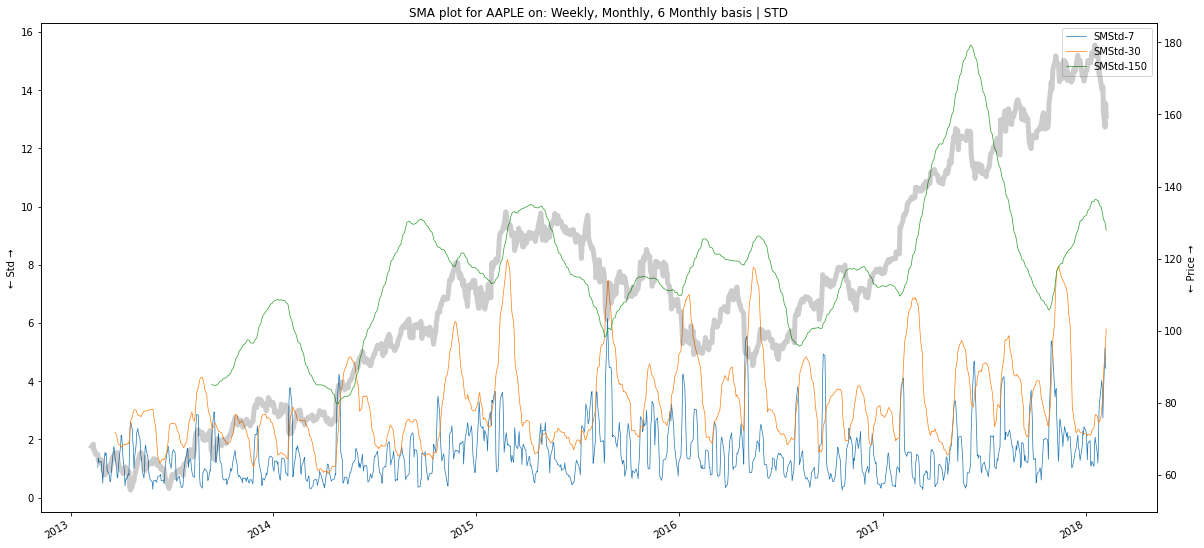

In [103]:
fig, ax1 = plt.subplots()

aaple[["SMStd-7", "SMStd-30", "SMStd-150"]].plot(figsize=(20, 10), ax=ax1, lw=0.7)
ax1.set_title("SMA plot for AAPLE on: Weekly, Monthly, 6 Monthly basis | STD");
ax1.set_ylabel("← Std →")

ax2 = ax1.twinx()
aaple["AAPL"].plot(ax=ax2, alpha=0.2, color="black", lw=5)
ax2.set_ylabel("← Price →");

Here, just for the sake of functionality we can see the `standard deviation` based on the window. 
- In the back ground with **black** line, it is the real stock prices
- It is obvious that the bigger the window is, the higher the std tends to be
- In the monthly window, we can see ***some seasonality*** effect as the `std` tends to get higher in some portion of a month
- In the 6 month basis we don't get so much intuative sense but still in the recent times the stock seems to be fluctuate more

# 

## 2 Stocks together

In [104]:
google_apple = df[["GOOG", "AAPL"]].copy().dropna()

In [145]:
corr = google_apple.rolling(30).corr()

In [146]:
corr

GOOG      AAPL
2014-03-27 GOOG       NaN       NaN
           AAPL       NaN       NaN
2014-03-28 GOOG       NaN       NaN
           AAPL       NaN       NaN
2014-03-31 GOOG       NaN       NaN
...                   ...       ...
2018-02-05 AAPL  0.132047  1.000000
2018-02-06 GOOG  1.000000  0.192615
           AAPL  0.192615  1.000000
2018-02-07 GOOG  1.000000  0.306196
           AAPL  0.306196  1.000000

[1950 rows x 2 columns]

Here, we have the `2 x 2` matrix for all dates. We can have a look at them individually. But, as a DS + Visual person, I would ***still*** like them to see in the chart

In [147]:
# Using pandas magic
idx = pd.IndexSlice
only_corr = corr.loc[idx[:, "GOOG"], "AAPL"].droplevel(1)

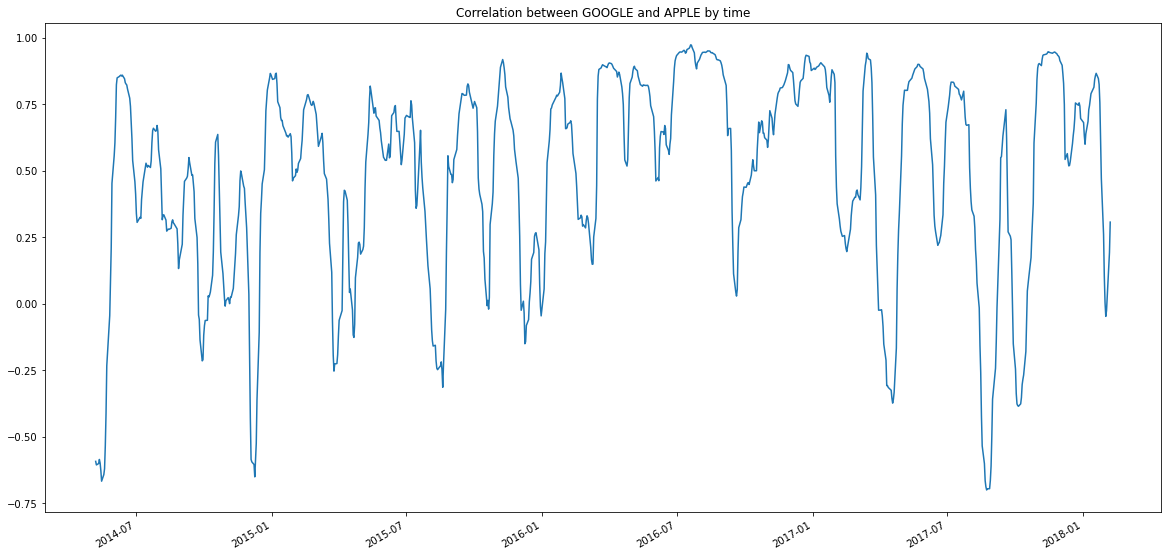

In [148]:
only_corr.plot(figsize=(20, 10))
plt.title("Correlation between GOOGLE and APPLE by time");

- Now, from this chart — both look ***a bit random***, I don't see any trend here they can be either **highly positive** or **highly negatively** correlated but when that would happen is a bit unknown.

- Another thing is that, there are very less chances of them being in the **state of no correlation**. There is some relation most of the time, but when is which - is unknown.